# Choose a Data Set
Pick one of the following data sets to analyze for your final project. 
- [Cosmetics](https://drive.google.com/drive/folders/1qvmRfGb7a_pYAtgW6614gxlP-bxl_Ptz?usp=drive_link)
- [Mental Health](https://drive.google.com/drive/folders/1YOp1aQVcmqlAkUEGHNPl_TyNXbY-xHwO?usp=drive_link)
- [Pokemon](https://drive.google.com/drive/folders/1kDu2oRgm_hUW5hdM0tHnMUqCGSKUYT1v?usp=drive_link)
- [Ramen](https://drive.google.com/drive/folders/1Y4_5QHOCy8rHc5EsEwDUuoCfp2WLo-MN?usp=drive_link)
- [Student Performance](https://drive.google.com/drive/folders/1fE31Ka38AnGpgfI_Es3z4psuA0phhH0Y?usp=drive_link)

# My Question

***Is there a correlation between technology usage ( x + y + z = Screen_Time_Hours) stress level?***

# My Analysis

In [2]:
# Write all the code needed for your analysis here. 
# You can add more cells to this section if you would like.

import pandas as pd
import seaborn as sns
data = pd.read_csv('mentalhealth.csv')
data.head()


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

<AxesSubplot:xlabel='Technology_Usage_Hours', ylabel='Count'>

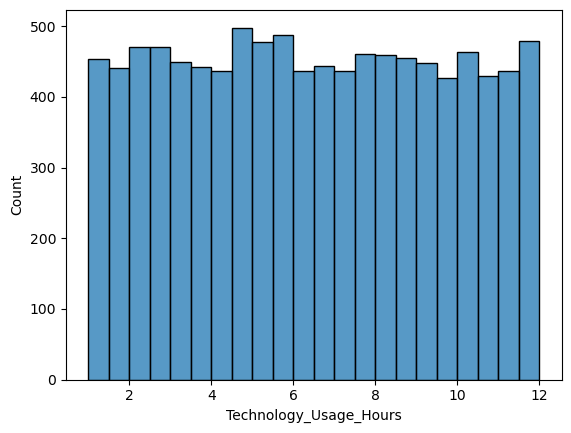

In [12]:
sns.histplot(data=data, x="Technology_Usage_Hours")

<AxesSubplot:xlabel='Social_Media_Usage_Hours', ylabel='Count'>

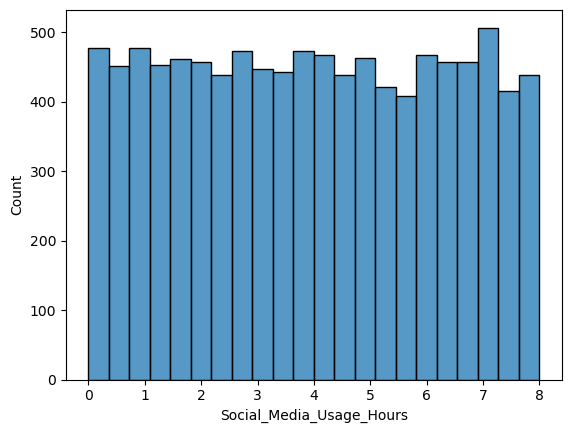

In [13]:
sns.histplot(data=data, x="Social_Media_Usage_Hours")

<AxesSubplot:xlabel='Gaming_Hours', ylabel='Count'>

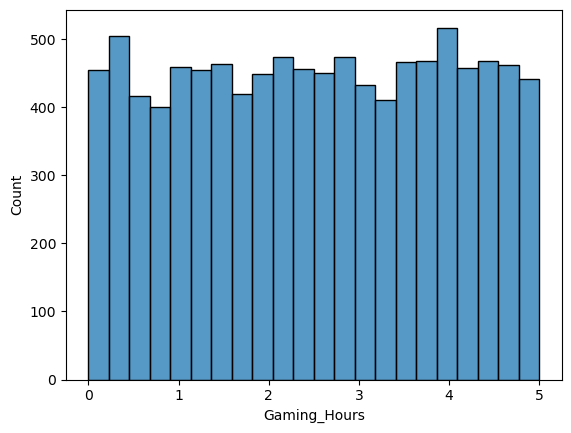

In [16]:
sns.histplot(data=data, x='Gaming_Hours')

<AxesSubplot:xlabel='Screen_Time_Hours', ylabel='Count'>

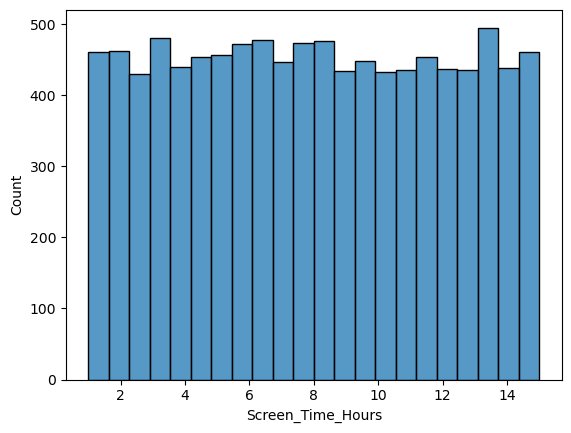

In [17]:
sns.histplot(data=data, x="Screen_Time_Hours")

In [30]:
stressLevelLow = 0
stressLevelMed = 0
stressLevelHigh = 0
stressLevelTotal = 0
for level in data['Stress_Level']:
    if level == "Low":
        stressLevelLow += 1
        stressLevelTotal += 1
    elif level == "Medium":
        stressLevelMed += 1
        stressLevelTotal += 1
    elif level == "High":
        stressLevelHigh += 1
        stressLevelTotal += 1
        
        
freqTable = {
    "Level":["Low", "Medium", "High"], 
    "Percentage":[stressLevelLow/stressLevelTotal*100, stressLevelMed/stressLevelTotal*100, stressLevelHigh/stressLevelTotal*100],
    "Count": [stressLevelLow, stressLevelMed, stressLevelHigh]
    }

freqTable_df = pd.DataFrame(freqTable)
print(freqTable_df)    



    Level  Percentage  Count
0     Low       33.32   3332
1  Medium       33.38   3338
2    High       33.30   3330


In [37]:
mean_usage = data['Technology_Usage_Hours'].mean()
std_usage = data['Technology_Usage_Hours'].std()

UsageLow = 0
UsageMed = 0
UsageHigh = 0
UsageTotal = 0
for level in data['Technology_Usage_Hours']:
    if level < mean_usage - std_usage:
        UsageLow += 1
        UsageTotal += 1
    elif mean_usage - std_usage <= level <= mean_usage + std_usage:
        UsageMed += 1
        UsageTotal += 1
    else:  
        UsageHigh += 1
        UsageTotal += 1
    
        
        
freqTable = {
    "Level":["Low", "Medium", "High"], 
    "Count": [UsageLow, UsageMed, UsageHigh]
    }

freqTable_df = pd.DataFrame(freqTable)
print(freqTable_df)
print(std_usage)



    Level  Count
0     Low   2113
1  Medium   5775
2    High   2112
3.169022410148379


In [35]:
'''Q1TikTok = data["Technology_Usage_Hours"].quantile(0.25)
medianTikTok = data["Technology_Usage_Hours"].quantile(0.5)
Q3TikTok = data["Technology_Usage_Hours"].quantile(0.75)

print(Q1TikTok, medianTikTok, Q3TikTok)

summary = {
    "Min": data["Technology_Usage_Hours"].min(),
    "Q1": Q1TikTok,
    "Median": medianTikTok,
    "Q3": Q3TikTok,
    "Max": data["Technology_Usage_Hours"].max()
}
summary'''


3.76 6.425 9.2125


{'Min': 1.0, 'Q1': 3.76, 'Median': 6.425, 'Q3': 9.2125, 'Max': 12.0}

# My Answer

***The purpose of this analysis is to explore the relationship between technology usage and mental health. This dataset displays various aspects of individuals' daily habits and well-being, including technology usage, social media activity, sleep patterns, physical activity, and mental health status. Utilizing this data, we aimed to explore and specific correlations between these variables and actual mental health score, with the hope of communicating the most important activities to undergo.***

***However, after undergoing various analysis techniques, we can confidently conclude that there is no clearly descernable coorelation between technology usage and mental health score (self-declared), even when we considered specific catagories of mental health.***

***It all stems from the distrubtion of data, which we can see through our various histograms which display the different factors of technological utilization among the sample group -> (Technology_Usage_Hours	Social_Media_Usage_Hours	Gaming_Hours	Screen_Time_Hours). Through these histograms, we can see clearly that the distrubution of data is uniform, linear. How can we interpret this? If our data distributions are uniform, it means that all values within a given range are equally likely to occur. In a uniform distribution, there is no bias or tendency toward any particular value; each outcome has the same probability of appearing. While just one varible being uniform has the ability to announce a particular prediction, every single varible in the data set here is the same way, even those not included technology (Sleep_Hours,	Physical_Activity_Hours). In the grand scheme, what does this mean? It means that in any random sample of information, we as the observer cannot make any predictions about other varibles that would be more or less likely than other scenarios.***

***However, while these uniform data distrubtions could pose a problem with how we can intepret this data, we can look at it from another angle, standard deviations. 